# Telco Churn

This example uses the Telco Churn dataset to predict which Telco user is likely to churn; that is, customers that will likely stop using Telco. You can download the Jupyter Notebook of the study <a href="churn.ipynb">here</a>.

<ul class="ul_content">    
    <li>Churn - customers that left within the last month</li>
    <li>Services - services of each customer (phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies)</li>
    <li>Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges</li>
    <li>Customer demographics - gender, age range, and if they have partners and dependents</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

This example uses the following version of VerticaPy:

In [1]:
import verticapy as vp
vp.__version__

'1.0.1'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="https://www.vertica.com/python/documentation/1.0.x/html/connection.html">connection tutorial</a>.

You can skip the below cell if you already have an established connection.

In [2]:
vp.connect("VerticaDSN")

Let's create a Virtual DataFrame of the dataset. The dataset is available <a href="../../data/churn.csv">here</a>.

,AbccustomerIDVarchar(20),AbcgenderVarchar(20),123SeniorCitizenInteger,010PartnerBoolean,010DependentsBoolean,123tenureInteger,010PhoneServiceBoolean,AbcMultipleLinesVarchar(100),AbcInternetServiceVarchar(22),AbcOnlineSecurityVarchar(38),AbcOnlineBackupVarchar(38),AbcDeviceProtectionVarchar(38),AbcTechSupportVarchar(38),AbcStreamingTVVarchar(38),AbcStreamingMoviesVarchar(38),AbcContractVarchar(28),010PaperlessBillingBoolean,AbcPaymentMethodVarchar(50),123MonthlyChargesNumeric(10),123TotalChargesNumeric(11),010ChurnBoolean
1,0002-ORFBO,Female,0,✅,✅,9,✅,No,DSL,No,Yes,No,Yes,Yes,No,One year,✅,Mailed check,65.6,593.3,❌
2,0003-MKNFE,Male,0,❌,❌,9,✅,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,❌,Mailed check,59.9,542.4,❌
3,0004-TLHLJ,Male,0,❌,❌,4,✅,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,✅,Electronic check,73.9,280.85,✅
4,0011-IGKFF,Male,1,✅,❌,13,✅,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,✅,Electronic check,98.0,1237.85,✅
5,0013-EXCHZ,Female,1,✅,❌,3,✅,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,✅,Mailed check,83.9,267.4,✅
6,0013-MHZWF,Female,0,❌,✅,9,✅,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,✅,Credit card (automatic),69.4,571.45,❌
7,0013-SMEOE,Female,1,✅,❌,71,✅,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,✅,Bank transfer (automatic),109.7,7904.25,❌
8,0014-BMAQU,Male,0,✅,❌,63,✅,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,✅,Credit card (automatic),84.65,5377.8,❌
9,0015-UOCOJ,Female,1,❌,❌,7,✅,No,DSL,Yes,No,No,No,No,No,Month-to-month,✅,Electronic check,48.2,340.35,❌
10,0016-QLJIS,Female,0,✅,✅,65,✅,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,✅,Mailed check,90.45,5957.9,❌

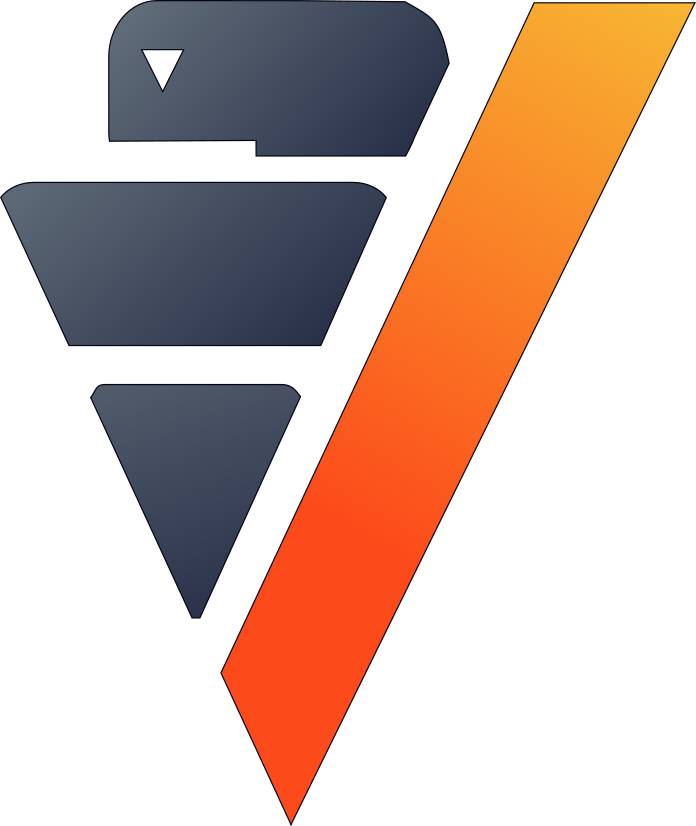

In [2]:
churn = vp.read_csv('customers.csv')
display(churn)

## Data Exploration and Preparation

Let's examine our data.

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

,dtype,count,top,top_percent,unique
"""customerID""",varchar(20),7043,0002-ORFBO,0.014,7043.0
"""gender""",varchar(20),7043,Male,50.476,2.0
"""SeniorCitizen""",int,7043,0,83.785,2.0
"""Partner""",boolean,7043,❌,51.697,2.0
"""Dependents""",boolean,7043,❌,70.041,2.0
"""tenure""",int,7043,1,8.704,73.0
"""PhoneService""",boolean,7043,✅,90.317,2.0
"""MultipleLines""",varchar(100),7043,No,48.133,3.0
"""InternetService""",varchar(22),7043,Fiber optic,43.959,3.0
"""OnlineSecurity""",varchar(38),7043,No,49.666,3.0

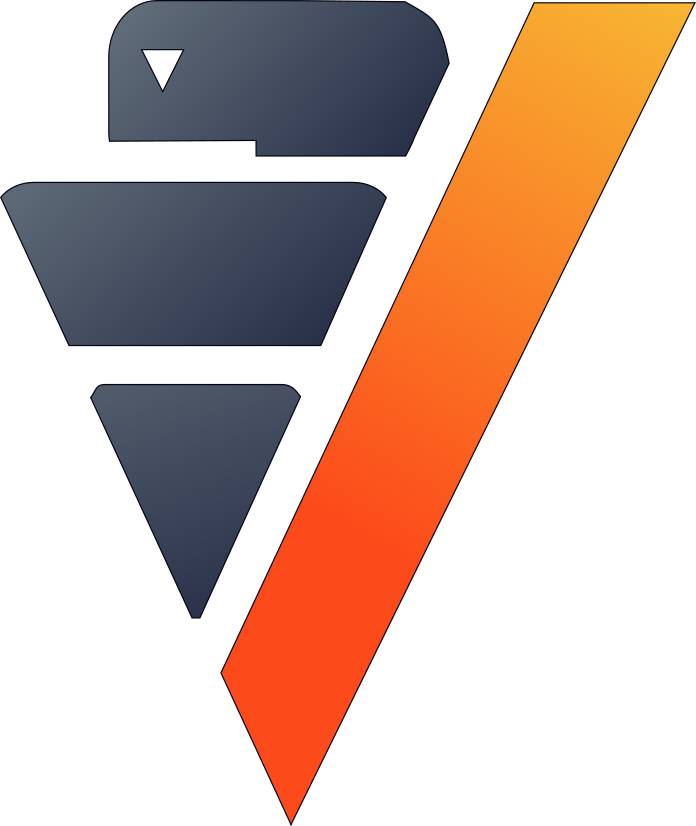

In [3]:
churn.describe(method = "categorical", unique = True)

Several variables are categorical, and since they all have low cardinalities, we can compute their dummies. We can also convert all booleans to numeric.

/opt/venv/lib/python3.10/site-packages/verticapy/core/vdataframe/_encoding.py:357: Warning: The vDataColumn '"customerID"' was ignored because of its high cardinality.
Increase the parameter 'max_cardinality' to solve this issue or use directly the vDataColumn one_hot_encode method.
  warnings.warn(warning_message, Warning)
/opt/venv/lib/python3.10/site-packages/verticapy/core/vdataframe/_encoding.py:357: Warning: The vDataColumn '"tenure"' was ignored because of its high cardinality.
Increase the parameter 'max_cardinality' to solve this issue or use directly the vDataColumn one_hot_encode method.
  warnings.warn(warning_message, Warning)
/opt/venv/lib/python3.10/site-packages/verticapy/core/vdataframe/_encoding.py:357: Warning: The vDataColumn '"MonthlyCharges"' was ignored because of its high cardinality.
Increase the parameter 'max_cardinality' to solve this issue or use directly the vDataColumn one_hot_encode method.
  warnings.warn(warning_message, Warning)
/opt/venv/lib/python3.

,123SeniorCitizenInteger,123PartnerInteger,123DependentsInteger,123tenureInteger,123PhoneServiceInteger,123MultipleLinesInteger,123OnlineSecurityInteger,123OnlineBackupInteger,123DeviceProtectionInteger,123TechSupportInteger,123StreamingTVInteger,123StreamingMoviesInteger,123PaperlessBillingInteger,123MonthlyChargesNumeric(10),123TotalChargesNumeric(11),123ChurnInteger,123gender_FemaleInteger,123InternetService_DSLInteger,123InternetService_Fiber_opticInteger,123Contract_Month-to-monthInteger,123Contract_One_yearInteger,123Integer,123Integer,123PaymentMethod_Electronic_checkInteger
1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.3,0,1,1,0,0,1,,,0
2,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.4,0,0,1,0,1,0,,,0
3,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,1,0,0,1,1,0,,,1
4,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,0,0,1,1,0,,,1
5,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.4,1,1,0,1,1,0,,,0
6,0,0,1,9,1,0,0,0,0,1,1,1,1,69.4,571.45,0,1,1,0,1,0,,,0
7,1,1,0,71,1,0,1,1,1,1,1,1,1,109.7,7904.25,0,1,0,1,0,0,,,0
8,0,1,0,63,1,1,1,0,0,1,0,0,1,84.65,5377.8,0,0,0,1,0,0,,,0
9,1,0,0,7,1,0,1,0,0,0,0,0,1,48.2,340.35,0,1,1,0,1,0,,,1
10,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.9,0,1,1,0,0,0,,,0

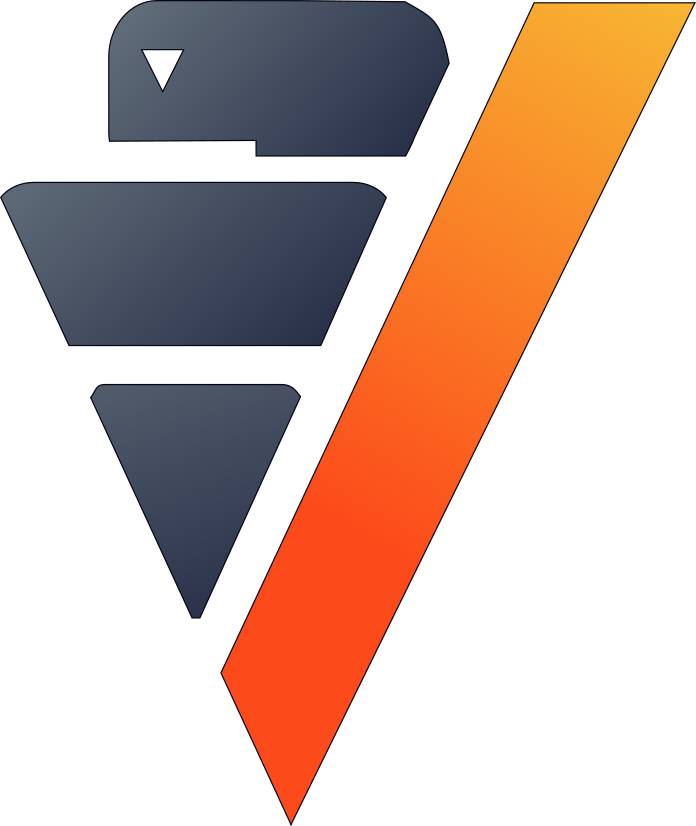

In [4]:
for column in ["DeviceProtection", 
               "MultipleLines",
               "PaperlessBilling",
               "Churn",
               "TechSupport",
               "Partner",
               "StreamingTV",
               "OnlineBackup",
               "Dependents",
               "OnlineSecurity",
               "PhoneService",
               "StreamingMovies"]:
    churn[column].decode("Yes", 1, 0)
churn.one_hot_encode().drop(["customerID", 
                             "gender", 
                             "Contract", 
                             "PaymentMethod", 
                             "InternetService"])

Let's compute the correlations between the different variables and the response column.

<AxesSubplot:>

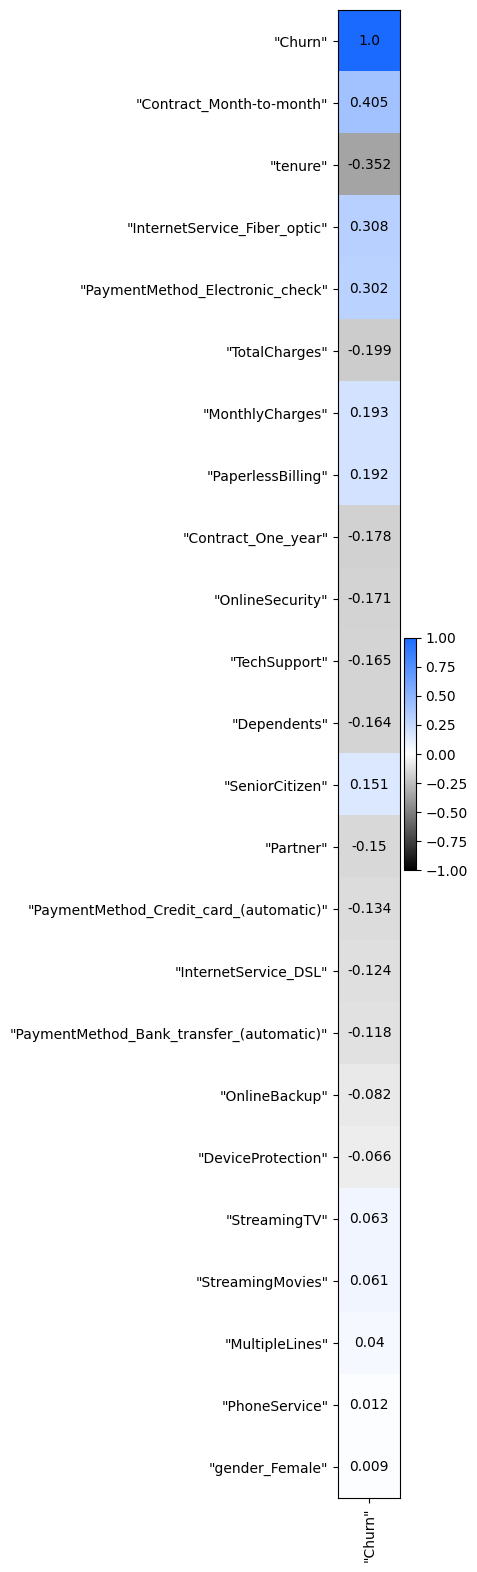

In [7]:
churn.corr(focus = "Churn")

Many features have a strong correlation with the 'Churn' variable. For example, the customers that have a 'Month to Month' contract are more likely to churn. Having this type of contract gives customers a lot of flexibility and allows them to leave at any time. New customers are also likely to churn.

/opt/venv/lib/python3.10/site-packages/verticapy/plotting/base.py:866: Warning:

The Virtual Column Contract_Month-to-month is not numerical. Its histogram will not be drawn.



<AxesSubplot:xlabel='tenure', ylabel='avg(Churn)'>

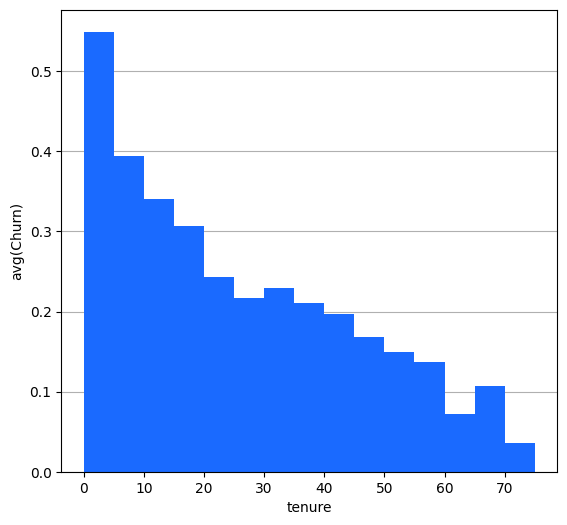

In [8]:
# No lock-in = Churn
churn.hist(["Contract_Month-to-month", "tenure"], method = "avg", of = "Churn")

The following scatter plot shows that providing better tariff plans can prevent churning. Indeed, customers having high total charges are more likely to churn even if they've been with the company for a long time.

<AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>

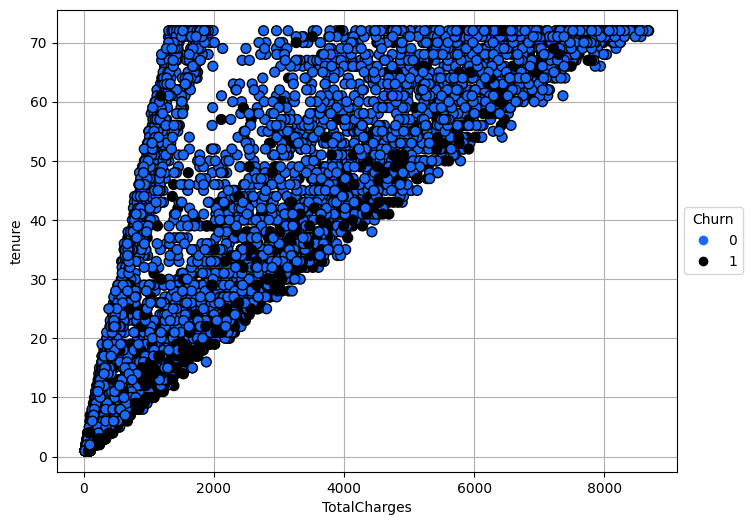

In [9]:
churn.scatter(["TotalCharges", "tenure"], by = "Churn")

Let's move on to machine learning.

## Machine Learning

Logistic regression is a very powerful algorithm and we can use it to detect churns. Let's split our vDataFrame into training and testing set to evaluate our model.

In [10]:
train, test = churn.train_test_split(test_size = 0.2, 
                                     random_state = 0)

Let's train and evaluate our model.



details
               predictor               |coefficient|std_err |z_value |p_value 
---------------------------------------+-----------+--------+--------+--------
               Intercept               | -2.01633  | 0.33233|-6.06727| 0.00000
             seniorcitizen             |  0.19788  | 0.12867| 1.53789| 0.12408
                partner                | -0.05181  | 0.10201|-0.50792| 0.61151
              dependents               | -0.11254  | 0.11223|-1.00280| 0.31596
                tenure                 | -0.05534  | 0.00756|-7.32186| 0.00000
             phoneservice              | -0.78389  | 0.37043|-2.11617| 0.03433
             multiplelines             |  0.24240  | 0.14186| 1.70874| 0.08750
            onlinesecurity             | -0.45198  | 0.15023|-3.00853| 0.00263
             onlinebackup              | -0.16972  | 0.14168|-1.19789| 0.23096
           deviceprotection            | -0.05265  | 0.12848|-0.40980| 0.68195
              techsupport              | -

,value
auc,0.8534709846290917
prc_auc,0.6320376422212695
accuracy,0.8173418621179815
log_loss,0.177088655224575
precision,0.6211180124223602
recall,0.5970149253731343
f1_score,0.60882800608828
mcc,0.4899051057324479
informedness,0.4832089552238805
markedness,0.4966940492887195

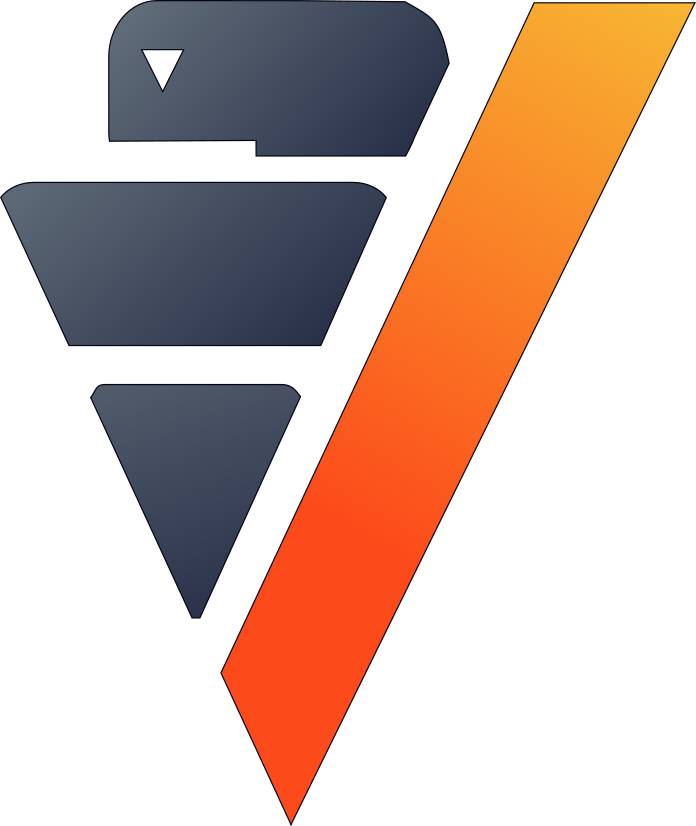

In [11]:
from verticapy.machine_learning.vertica.linear_model import LogisticRegression
model = LogisticRegression("churn_model", 
                           penalty = 'L2', 
                           tol = 1e-6, 
                           max_iter = 1000, 
                           solver = "BFGS")
model.fit(train, 
          churn.get_columns(exclude_columns = ["churn"]), 
          'churn',
          test)
model.classification_report()

The model is excellent! Let's run some machine learning on the entire dataset and compute the importance of each feature.



details
               predictor               |coefficient|std_err |z_value |p_value 
---------------------------------------+-----------+--------+--------+--------
               Intercept               | -2.02037  | 0.28756|-7.02584| 0.00000
             seniorcitizen             |  0.22000  | 0.09781| 2.24920| 0.02450
                partner                | -0.00067  | 0.09266|-0.00719| 0.99427
              dependents               | -0.14658  | 0.10106|-1.45043| 0.14694
                tenure                 | -0.06026  | 0.00710|-8.48861| 0.00000
             phoneservice              | -0.79840  | 0.34770|-2.29623| 0.02166
             multiplelines             |  0.20284  | 0.13111| 1.54716| 0.12183
            onlinesecurity             | -0.44474  | 0.13446|-3.30766| 0.00094
             onlinebackup              | -0.21322  | 0.11906|-1.79080| 0.07333
           deviceprotection            | -0.09535  | 0.12370|-0.77078| 0.44084
              techsupport              | -

<AxesSubplot:xlabel='Importance (%)', ylabel='Features'>

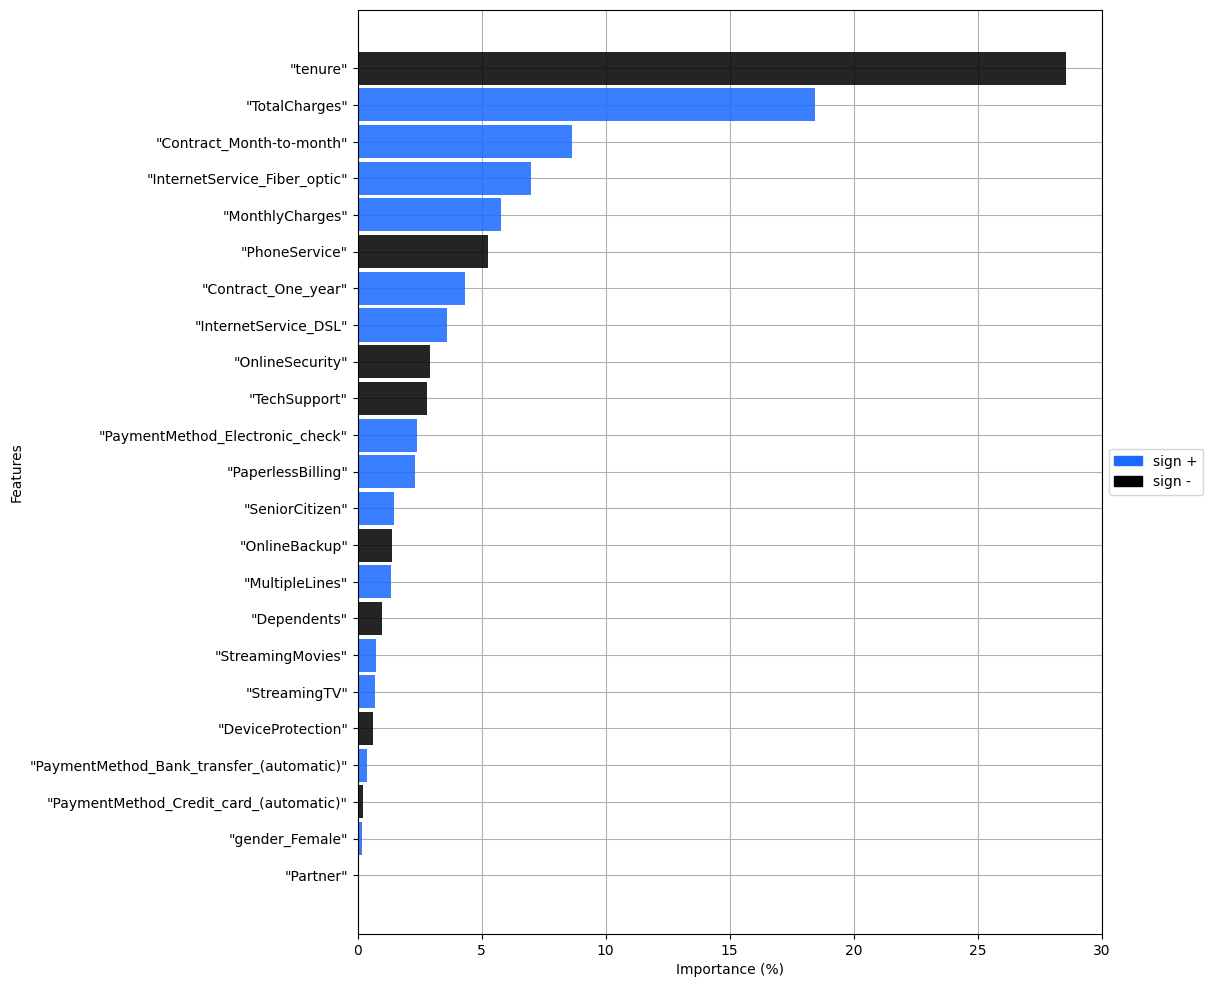

In [13]:
model = LogisticRegression("churn_model_2", 
                           penalty = 'L2', 
                           tol = 1e-6, 
                           max_iter = 1000, 
                           solver = "BFGS")
model.fit(churn, 
          churn.get_columns(exclude_columns = ["churn"]), 
          'churn')
model.features_importance()

Based on our model, most churning customers are at least one of the following:
<ul>
 <li>Paying higher bills</li>
 <li>New Telco customers</li>
 <li>Have a monthly contract</li>
</ul>

Notice that customers have a 'Fiber Optic' option are also likely to churn. Let's check if this relationship is causal by computing some aggregations.

,123InternetService_Fiber_opticInteger,123tenureFloat(22),123totalchargesFloat(22),123contract_month_to_monthFloat(22),123monthlychargesFloat(22)
1,1,32.9179586563307,3205.30457041344,0.68733850129199,91.5001291989664
2,0,31.9422346085635,1558.06548526423,0.442614644033443,43.7882442361287

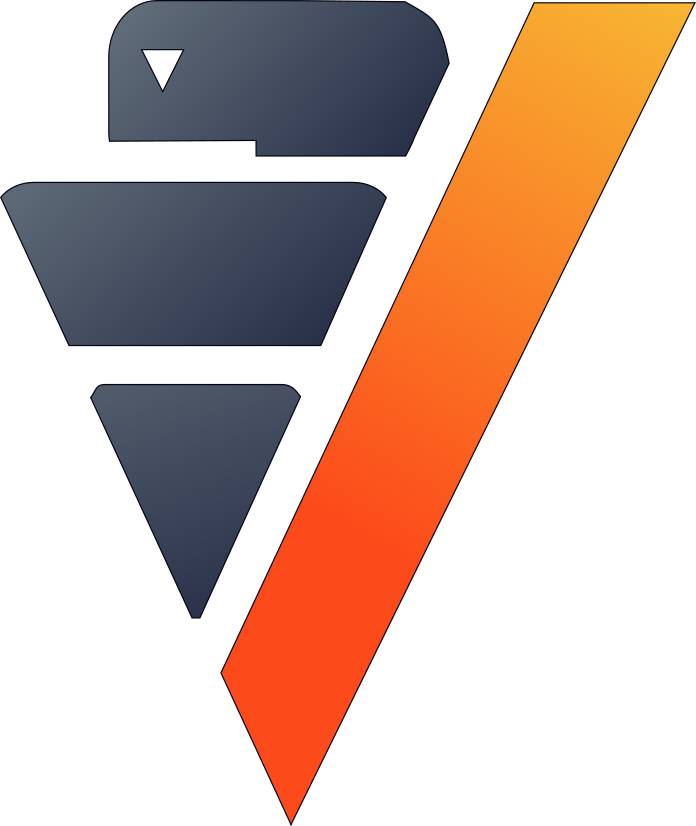

In [14]:
import verticapy.sql.functions as st
# Is Fiber optic a Bad Option? - VerticaPy
churn.groupby(["InternetService_Fiber_optic"], 
              [st.avg(churn["tenure"])._as("tenure"),
               st.avg(churn["totalcharges"])._as("totalcharges"),
               st.avg(churn["contract_month-to-month"])._as("contract_month_to_month"),
               st.avg(churn["monthlycharges"])._as("monthlycharges")])

It seems like the 'Fiber Optic' option in and of itself doesn't lead to churning, but customers that have this option tend to churn because their contract puts them into one of the three categories we listed before: they're paying more.

To retain these customers, we'll need to make some changes to what types of contracts we offer.

We'll use a lift chart to help us identify which of our customers are likely to churn.

<AxesSubplot:title={'center':'Lift Table'}, xlabel='Cumulative Data Fraction', ylabel='Values'>

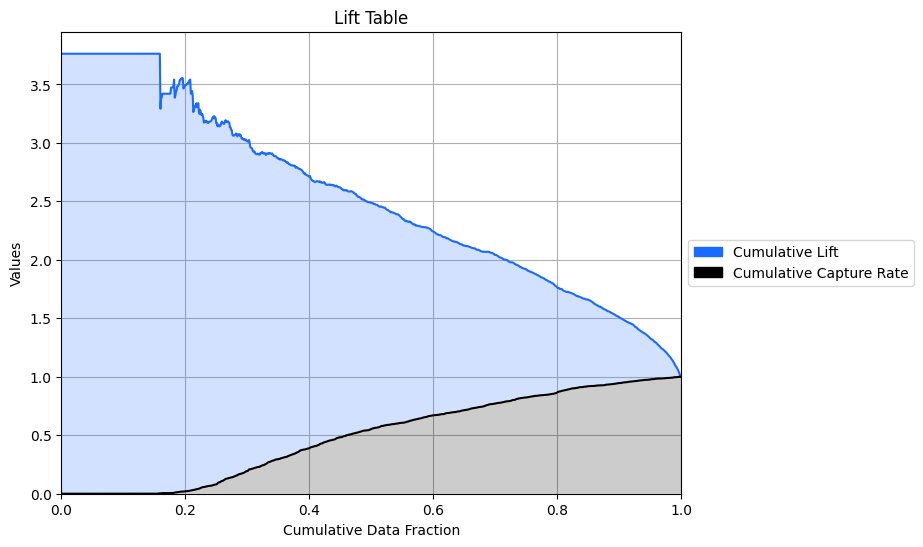

In [15]:
model.lift_chart()

By targeting less than 30% of the entire distribution, our predictions will be more than three times more accurate than the other 70%.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!